In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Load Data

In [2]:
df = pd.read_excel("Desktop/Tunde/Data Science Course 2020/Cars.xlsx")

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

In [4]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,309
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
# The 'Model' column is a categorical variable with too many unique values. 
# We ll drop for now but learn how to deal with in future 

In [6]:
df.drop('Model',axis=1,inplace=True)

In [7]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### dealing with missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 271.7+ KB


In [9]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
#Rule of thumb - if you are removing <5% of the observation, you are free to just remove all that have MV

In [11]:
data_no_MV = df.dropna()

In [12]:
data_no_MV.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs (Probability Distribution Function)

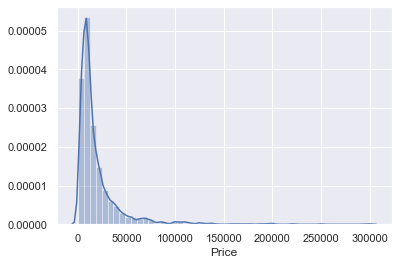

In [13]:
sns.distplot(data_no_MV['Price'])

### Dealing with outliers

In [14]:
data_no_MV['Price'].quantile([1,0.99,0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.90])

1.00    300000.00
0.99    129812.52
0.98    103999.00
0.97     81639.72
0.96     70000.00
0.95     64820.00
0.94     56500.00
0.93     51500.00
0.92     47316.00
0.91     43983.16
0.90     40996.00
Name: Price, dtype: float64

In [15]:
q = data_no_MV['Price'].quantile(0.99)

data_1= data_no_MV[data_no_MV['Price']<q]

In [16]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


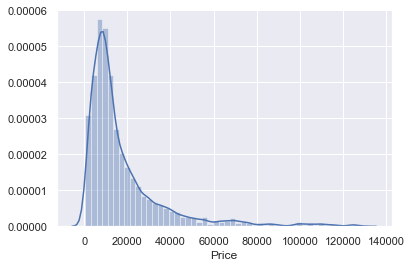

In [17]:
sns.distplot(data_1['Price'])

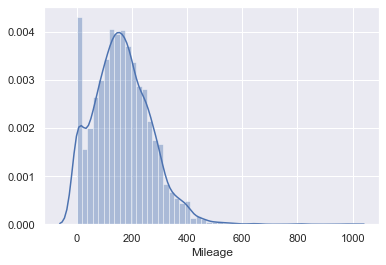

In [18]:
sns.distplot(data_1['Mileage'])

In [19]:
q = data_1['Mileage'].quantile(0.99)

data_2= data_1[data_1['Mileage']<q]

In [20]:
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


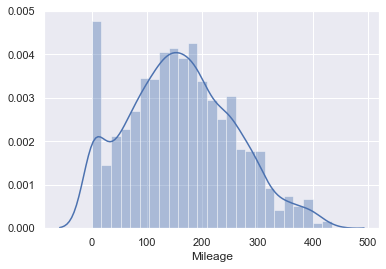

In [21]:
sns.distplot(data_2['Mileage'])

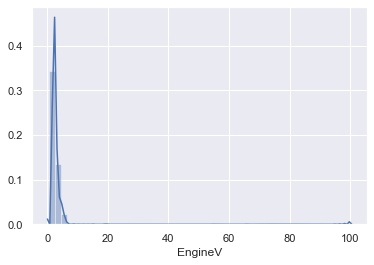

In [22]:
sns.distplot(data_2['EngineV'])

In [23]:
data_3= data_2[data_2['EngineV']<6.5]

In [24]:
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


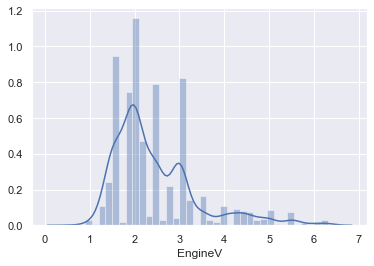

In [25]:
sns.distplot(data_3['EngineV'])

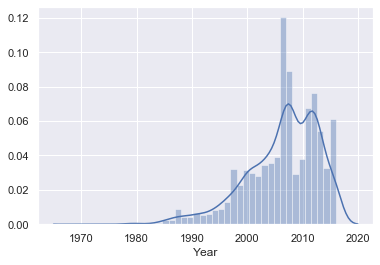

In [26]:
sns.distplot(data_3['Year'])

In [27]:
q = data_3['Year'].quantile(0.01)

data_4= data_3[data_3['Year']>q]

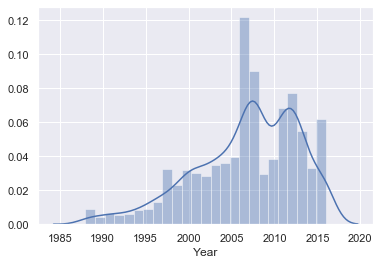

In [28]:
sns.distplot(data_4['Year'])

In [29]:
data_cleaned = data_4.reset_index(drop=True)

In [30]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking the OLS assumptions

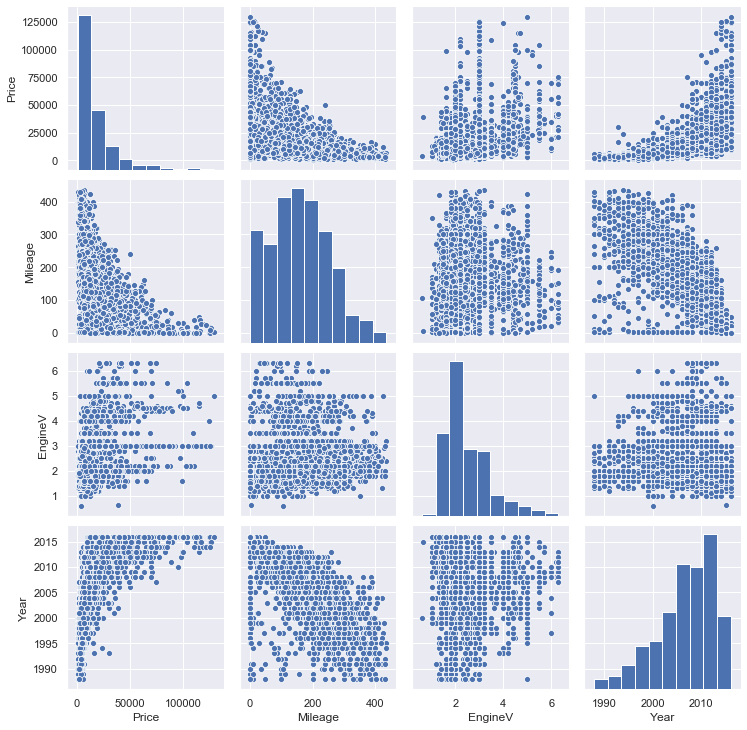

In [31]:
sns.pairplot(data_cleaned,palette='husl')

Text(0.5, 0, 'Year')

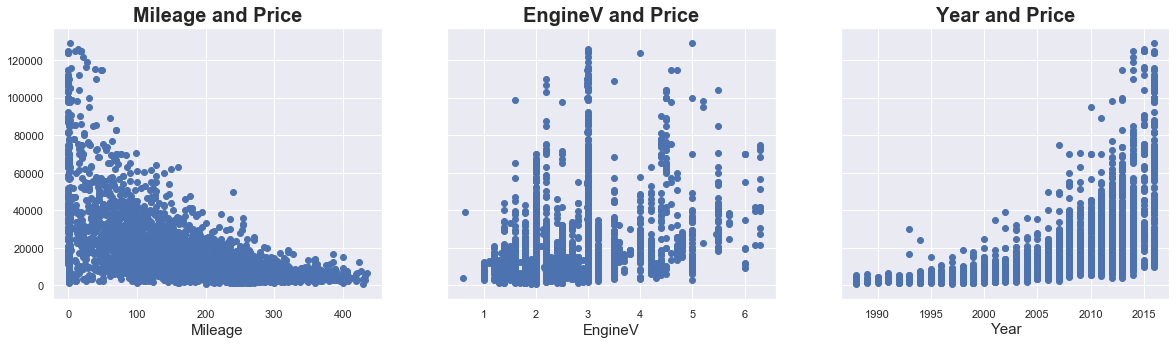

In [32]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5),sharey=True)

ax1.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax1.set_title('Mileage and Price',weight='bold',fontsize=20)
ax1.set_xlabel('Mileage',fontsize=15)

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('EngineV and Price',weight='bold',fontsize=20)
ax2.set_xlabel('EngineV',fontsize=15)

ax3.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax3.set_title('Year and Price',weight='bold',fontsize=20)
ax3.set_xlabel('Year',fontsize=15)

In [33]:
# Price does not have a linear relationship with above variables so we need to transform

### Relaxing the assumptions

In [34]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

In [35]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


Text(0.5, 0, 'Year')

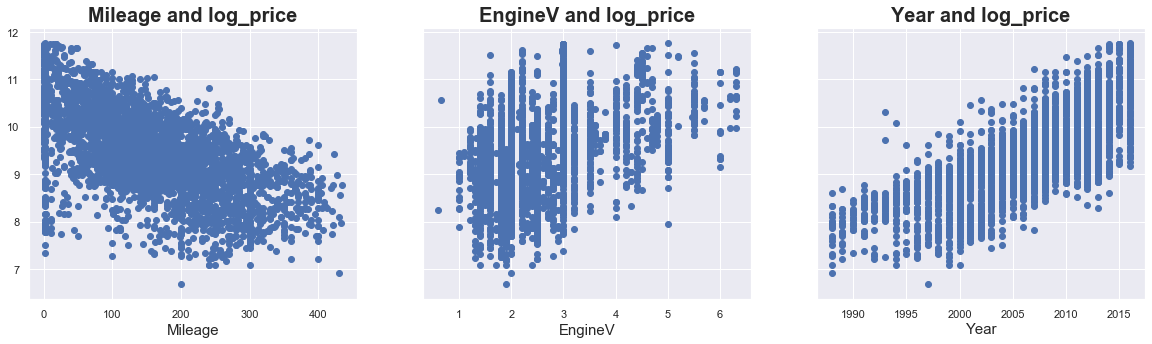

In [36]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5),sharey=True)

ax1.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax1.set_title('Mileage and log_price',weight='bold',fontsize=20)
ax1.set_xlabel('Mileage',fontsize=15)

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('EngineV and log_price',weight='bold',fontsize=20)
ax2.set_xlabel('EngineV',fontsize=15)

ax3.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax3.set_title('Year and log_price',weight='bold',fontsize=20)
ax3.set_xlabel('Year',fontsize=15)

In [37]:
# The relationship is now somewhat linear 

In [38]:
data_cleaned = data_cleaned.drop('Price',axis=1)

In [39]:
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


In [40]:
# Rearrange columns such that the log_price column is moved to the front

In [41]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [42]:
columns = ['log_price','Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
           'Registration', 'Year']

In [43]:
data_cleaned = data_cleaned[columns]

In [44]:
data_cleaned.head()

,log_price,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year
0,8.342840,BMW,sedan,277,2.0,Petrol,yes,1991
1,8.974618,Mercedes-Benz,van,427,2.9,Diesel,yes,1999
2,9.495519,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003
3,10.043249,Audi,crossover,240,4.2,Petrol,yes,2007
4,9.814656,Toyota,crossover,120,2.0,Petrol,yes,2011


# Multicollinearity

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [46]:
vif

,VIF Factor,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [47]:
# vif > 10 may suggest multicollinearity so drop from data

In [48]:
data_no_multicollinearity = data_cleaned.drop('Year',axis=1)

In [49]:
data_no_multicollinearity.head()

,log_price,Brand,Body,Mileage,EngineV,Engine Type,Registration
0,8.342840,BMW,sedan,277,2.0,Petrol,yes
1,8.974618,Mercedes-Benz,van,427,2.9,Diesel,yes
2,9.495519,Mercedes-Benz,sedan,358,5.0,Gas,yes
3,10.043249,Audi,crossover,240,4.2,Petrol,yes
4,9.814656,Toyota,crossover,120,2.0,Petrol,yes


# Create dummy variables

In [50]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [51]:
data_with_dummies.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [52]:
data_preprocessed = data_with_dummies

# Linear Regression Model

### Declare the input and targets

In [53]:
y = data_preprocessed['log_price']
X = data_preprocessed.drop('log_price',axis=1)

### Scale data

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
x = scaler.transform(X)

In [56]:
# it is usually not recommended to standardise dummy variables
# for ML purposes, scaling has no effect on the predictive power of dummies
# Once scaled though, they loss all thier dummy meaning

### Train_Test_Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Create Linear Regression

In [59]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_pred = model.predict(x_train)

(6, 12)

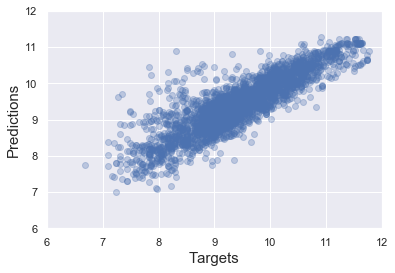

In [61]:
plt.scatter(y_train,y_pred,alpha=0.3)
plt.xlabel('Targets', fontsize=15)
plt.ylabel('Predictions',fontsize=15)
plt.xlim(6,12)
plt.ylim(6,12)

Text(0.5, 1.0, 'Residual PDF')

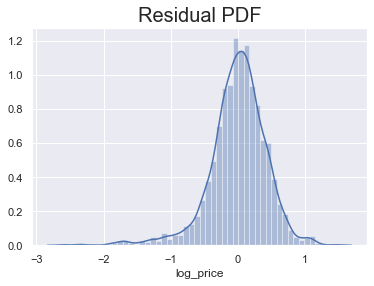

In [62]:
sns.distplot(y_train - y_pred)
plt.title('Residual PDF',size=20)

In [63]:
model.score(x_train,y_train)

0.7546487921881218

### Finding the weights and bias

In [64]:
model.intercept_

9.421003614148074

In [65]:
model.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [66]:
model_summary = DataFrame()
model_summary['Features'] = X.columns.values
model_summary['Weights'] = model.coef_

In [67]:
model_summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


In [68]:
model_summary.index = model_summary.index + 1
model_summary.loc[0] = ['Intercept',model.intercept_]

In [69]:
model_summary.sort_index()

,Features,Weights
0,Intercept,9.421004
1,Mileage,-0.468156
2,EngineV,0.215268
3,Brand_BMW,0.011052
4,Brand_Mercedes-Benz,0.005692
5,Brand_Mitsubishi,-0.142472
6,Brand_Renault,-0.187693
7,Brand_Toyota,-0.065297
8,Brand_Volkswagen,-0.098989
9,Body_hatch,-0.139808


# Testing

In [70]:
y_test_pred = model.predict(x_test)

(6, 12)

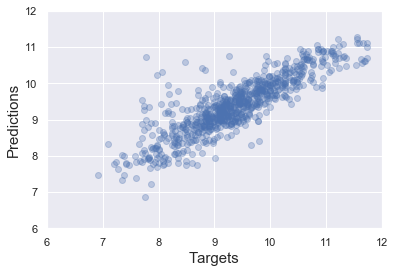

In [71]:
plt.scatter(y_test,y_test_pred,alpha=0.3)
plt.xlabel('Targets', fontsize=15)
plt.ylabel('Predictions',fontsize=15)
plt.xlim(6,12)
plt.ylim(6,12)

In [72]:
model.score(x_test,y_test)

0.7352752333232251

In [73]:
df_perf = DataFrame()
df_perf['Prediction'] = np.exp(y_test_pred)
df_perf['Target'] = np.exp(y_test.reset_index(drop=True))
df_perf['Residual'] = df_perf['Target'] - df_perf['Prediction']
df_perf['% Difference'] = np.abs((df_perf['Residual']/df_perf['Target'])*100)

In [74]:
pd.set_option('display.max_rows', None)
df_perf.round(2)

,Prediction,Target,Residual,% Difference
0,40419.31,21300.00,-19119.31,89.76
1,7956.90,8900.00,943.10,10.60
2,5757.28,3250.00,-2507.28,77.15
3,9765.81,12000.00,2234.19,18.62
4,7027.36,5400.00,-1627.36,30.14
5,16586.98,15300.00,-1286.98,8.41
6,18012.80,4200.00,-13812.80,328.88
7,8150.20,9200.00,1049.80,11.41
8,40941.00,55500.00,14559.00,26.23
9,79026.35,104000.00,24973.65,24.01


In [75]:
df_perf.describe()

,Prediction,Target,Residual,% Difference
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [76]:
df_perf.sort_values(by='% Difference')

,Prediction,Target,Residual,% Difference
387,13602.753468,13600.00,-2.753468,0.020246
74,28889.063628,28900.00,10.936372,0.037842
314,35530.207664,35500.00,-30.207664,0.085092
336,11313.265936,11300.00,-13.265936,0.117398
425,2995.676139,3000.00,4.323861,0.144129
262,52180.113403,52055.25,-124.863403,0.239867
674,3107.506596,3100.00,-7.506596,0.242148
648,9675.565748,9700.00,24.434252,0.251900
79,21407.589940,21335.00,-72.589940,0.340239
313,9865.724471,9900.00,34.275529,0.346217
